# Intro to Pandas and Matplotlib

****

Hello and welcome to a quick dive into basic python functions that we (Wes Tatum and Jon Onorato) think are going to be useful to you as a member of the Luscombe Lab. 

# Pandas

***

Pandas is a data manipulation system within Python. In a lot of ways, it's easy to think of it as being similar to Microsoft Excel, as it has a somewhat similar structure. Instead of sheets, data is stored within something called a Dataframe. Dataframes have rows and columns, just like you would in an Excel sheet. The row and column names and values can be integers or strings (*ie*, words and letters). These cell values can also be lists of values

| ... | Column 0 | Column 1 | Column 2 | ... | Cell Y |
| --- | --- | --- | --- | --- | --- |
| Row 0 | Cell 00 | Cell 01 | Cell 02 | ... | Cell 0Y |
| Row 1| Cell 10 | Cell 11 | Cell 12 | ... | Cell 1Y |
| ... | ... | ... | ... | ... | ... | ... |
| Row 2 | Cell X0 | Cell X1 | Cell 12 | ... | Cell XY |

Pandas is a convenient tool for data storage, and for interacting with it with Python. We'll go through the process of building a Pandas Dataframe, either using Python, or by uploading from an excel document or a .txt file. There's a lot of things you can do within pandas, but most of the time, you use pandas to help you do something with the data. As such, pandas is often a supporting tool for further work, such as plotting, or numerical calculations. Additionally, many other communities and software packages build their tools with pandas in mind, so having familiarity with pandas can improve your ability to work with those other tools.

First, we'll build a dataframe from the ground up, within Python, to give you a better feel for how this works. 

To do this, we'll need to first import Pandas. Pandas is a commonly used tool, and most of the time the Python community refers to it as "pd" instead of "pandas" within their code lines. As such, when we import it we will import it with an *alias* of "pd", which means that when we want to call pandas, we just have to type "pd".

In [2]:
#When we use "as", that's what is assigning the alias to pandas.
import pandas as pd

Import statements like the above make the installed code available to Python in this notebook. This is necessary because it simplifies how many possible code packages Python has to search through to figure out what you're trying to do. 

Ok, now  that we have pandas available to us, let's use it to build a dataframe. Pandas allows you to do this through the function `DataFrame()`. NOTE THAT THE 'F' IS CAPITALIZED! This is a very common error for people when learning pandas. We'll need to prepare some data for our toy dataframe. We'll do this three different ways - with a set of series, with a dictionary, and directly in the initialization statement. 

In [3]:
series_1 = [1, 12]
series_2 = [5, 6]
series_3 = [9, 2]
series_names = ['x', 'y']
dict_1 = {'x': [1, 5, 9], 'y': [12, 6, 2]}

series_df = pd.DataFrame([series_1, series_2, series_3], columns = series_names)
dict_df = pd.DataFrame(dict_1)

direct_df = pd.DataFrame([[1, 12], [5, 6], [9, 2]], columns = ['x', 'y'])

In [4]:
series_df

,x,y
0,1,12
1,5,6
2,9,2


In [5]:
dict_df

,x,y
0,1,12
1,5,6
2,9,2


In [6]:
direct_df

,x,y
0,1,12
1,5,6
2,9,2


Each of these gives us the same final dataframe, but the way you have to construct it is very different. The way pandas is set up is very "row-oriented". 

All this being said, the most common way to put data into a dataframe is by importing it from an outside text file or excel spreadsheet. We'll cover that a bit more in-depth later in this notebook. For now, let's focus on manipulating our current data. 

The first thing you need to do in order to be able to interact with the data is to know what it looks like. So far we've been getting away with printing the whole thing, either by typing the name of the dataframe or by using print statements. While this works for the relatively small dataframes we've been working with, it's difficult for larger dataframes that may have thousands of entries. For these, we need a way of seeing a limited amount of entries in a dataframe. For this, we use the .head() and .tail() methods. As their names suggest, head starts at the top of a dataframe, and tail at the bottom. Unfortunately, our dataframe is a bit short to show what this might mean, so we'll explore a bit more in-depth later on when we have longer dataframes. For now, we'll just show you the basics of this function.

In [7]:
#Let's set our toy dataframe up, for simplicity.
#We use .copy() because otherwise (ie, toy_df = direct_df) it makes toy_df the same dataframe as direct_df. \
#In other words if we were to change direct_df, toy_df would also be changed. 
toy_df = direct_df.copy()

In [8]:
toy_df.head()

,x,y
0,1,12
1,5,6
2,9,2


In [9]:
toy_df.tail()

,x,y
0,1,12
1,5,6
2,9,2


The first thing we need to learn how to do to interact with our data is to access data in the dataframe. We can select everything based on on its indices, as well as by a column name. 

In [10]:
#We can call individually all the x values:
x_values = toy_df['x']
x_values
print (x_values)

#We can also select an individual row and column, either directly, or from the x_values variable:
print(toy_df['x'][2])
print(x_values[2])

#Remember that dataframes start with 0, meaning that the first row is row 0, not row 1. 
#So a dataframe with 3 entries only has a maximum row index of 2.

0    1
1    5
2    9
Name: x, dtype: int64
9
9


We can also pull out an entire row, using the `.iloc` feature.

In [11]:
#Pull all the values in row 1
print(toy_df.iloc[1])

#Or even multiple rows
print(toy_df.iloc[[0,1]])

x    5
y    6
Name: 1, dtype: int64
   x   y
0  1  12
1  5   6


Ok, so now that you're comfortable finding data in a pandas dataframe, let's look into one of the most common pieces of data manipulation you might want to do with a data frame. First, let's add a new column to our data, z, which is made from the equation x^2 - y.  

In [12]:
#Prepare our data:
z_series = [0, 0, 0]
for i in (toy_df.index):
    z_series[i] = ((toy_df['x'][i])**2) - (toy_df['y'][i])
print(z_series)

[-11, 19, 79]


In [13]:
#Now actually generate a new column, 'z', and set it equal to the data. 
toy_df['z'] = z_series

In [14]:
toy_df

,x,y,z
0,1,12,-11
1,5,6,19
2,9,2,79


Ok, so let's say we messed up and name things x, y, and z, but actually wanted them to be called a, b, and c. Easy fix!

In [15]:
toy_df.columns = ['a', 'b', 'c']
toy_df

,a,b,c
0,1,12,-11
1,5,6,19
2,9,2,79


Pandas also has several built in mathematical functions that might be useful. Standard deviations, averages, minimums, and maximums are all easily calculated from a pandas dataframe. std, avg, min, and max.

In [16]:
#Std per column is helpful:
print("Col. A Std. = " + str(toy_df['a'].std()))

#But you can also do it by the row, if that helps: 
print("Row 2 Std. = " + str(toy_df.iloc[2].std()))

Col. A Std. = 4.0
Row 2 Std. = 42.579337712087536


In [17]:
#Averages could be useful for every column in table, a column, several columns, or by rows. 
print("Whole table average: " + str(toy_df.mean()))
print("Col. B average: " + str(toy_df['b'].mean()))
print("Col. A and B average: " + str(toy_df[['a','b']].mean()))
print("Row 1 average: " + str(toy_df.iloc[1].mean()))

#As a compound idea, let's make a new column, "Ave", in our dataframe to return the average of each row:
#First we have to collect the averages for each row into a series:
#(Note that normally we would just do the below as a loop instead, but this still works)
averages = [toy_df.iloc[0].mean(), toy_df.iloc[1].mean(), toy_df.iloc[2].mean()]

#And once we have the averages, we just insert a new column!
toy_df['Ave'] = averages
toy_df

Whole table average: a     5.000000
b     6.666667
c    29.000000
dtype: float64
Col. B average: 6.666666666666667
Col. A and B average: a    5.000000
b    6.666667
dtype: float64
Row 1 average: 10.0


,a,b,c,Ave
0,1,12,-11,0.666667
1,5,6,19,10.000000
2,9,2,79,30.000000


In [18]:
#Finally, mins and maxes
print("Column A max: " + str(toy_df['a'].max()))
print("Column B min: " + str(toy_df['b'].min()))

Column A max: 9
Column B min: 2


Ok, now to bring several of these operations together in one place, let's do a complex combination of the above - Making a dataframe of all the places where one column had bigger than average values. This could be useful when looking for champion performing devices, for example.

In [19]:
#Let's look at the situation from column "C"
max_rows = []
for i in toy_df.index:
    if toy_df['c'][i] > toy_df['c'].mean():
        max_rows.append(toy_df.iloc[i])
above_ave_df = pd.DataFrame(max_rows)
above_ave_df

,a,b,c,Ave
2,9.0,2.0,79.0,30.0


While we hope that this has answered all your questions and allows you to do everything you want in pandas, we're sure there's going to be stuff we didn't expect. Pandas has a tremendous amount of functionality, and it'd be impossible to cover everything. If there's something you want to try to do with pandas, you should definitely google it to see what's what. Odds are good someone has had your problem before too. 

****

# Matplotlib 

Matplotlib is one of the standard libraries for plotting data in Python. It really does have a broad range of functionality, but there are other more specialized tools if you want to do something really complex. 

First, we'll import matplotlib's pyplot package, which is what most everyone uses for the plotting purposes. As with pandas, matplotlib is typically aliased. We use plt for the alias for matplotlib. 

In [20]:
import matplotlib.pyplot as plt

Let's start by generating a basic plot of the toy data we made above.

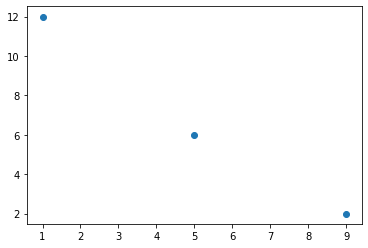

In [21]:
plt.scatter(toy_df['a'], toy_df['b'])
plt.show()

This is obviously an extremely rudimentary plot, and would not pass muster for a publication, or even a quick update slide. We need to add additional details like labels and titles. We also might like to plot more than one set of data on a single figure, and have each set of data points connected by lines, rather than just a scatter plot. Let's do all that now.

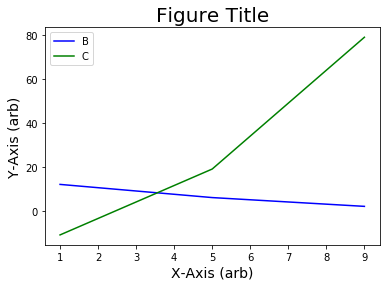

In [22]:
#Note that this time we pass both a "Label" as well as a "color", so we can differentiate our data. 
plt.plot(toy_df['a'], toy_df['b'], Label = "B", color = 'b')

#There is a full list of  colors and formatting available on matplotlib's website.
plt.plot(toy_df['a'], toy_df['c'], Label = "C", color = 'g')

#Label our various axes
plt.xlabel("X-Axis (arb)", fontsize = 14)
plt.ylabel("Y-Axis (arb)", fontsize = 14)
plt.title("Figure Title", fontsize = 20)

#To show the legend, we'll need to explicitly tell the plot to do so. 
plt.legend()
plt.show()

Ok! There you have it, a decent example of a quick figure. `plt.plot` is a pretty decent way to get something up and running quite quickly, however, it starts to have trouble when more complicated things are asked of it. When you're looking for either a higher quality figure, or one with more features or more control, then you'll need to use the `subplots` feature of matplotlib. Let's dig into that below with a quick example with some real-world data.

### Real world example time:

Ok, now that we've played around with some toy data, let's move on to using actual, real data. We'll start by loading in the data. Pandas has a really lovely function set called "read_csv" and "read_excel" which allow it to copy most of the structure from either an excel spreadsheet or a csv file. We'll make use of both of these in this tutorial. 

Once we've read in our real data, we'll also print it, to show you the format of our dataframe.

In [23]:
#Because we have multiple sheets in our excel file, we need to tell it which one we actually want. 
pd.read_excel("Kinetics Data.xlsx", sheet_name = "dppp monothiophene")

,Time,STD,Standard Error,Average,STD/2
0,0,0.000000,0.000000,100.000000,0.000000
1,5,0.872953,0.504000,44.987988,0.436476
2,10,3.452773,1.993459,39.562346,1.726386
3,20,1.659586,0.958163,32.884478,0.829793
4,30,3.020083,1.743646,29.248119,1.510041
5,60,1.624114,0.937683,27.641621,0.812057
6,120,2.459460,1.419970,26.085721,1.229730
7,180,1.637315,0.945304,28.056394,0.818657


Ok, but just one set of data isn't that interesting. Let's load up a few, so we have interesting things to plot.

Notice that this time we actually set the read-in data equal to something. The reason we're doing this is that we will want to be able to reference this data by some name. Above, all we did was read the data, then, because we didn't tell the computer to save it anywhere, it just "forgets" about it. This time, we'll set up a name for each of our dataframes, "dppp", "m_ligand", and "p_ligand".

In [24]:
dppp = pd.read_excel("Kinetics Data.xlsx", sheet_name = "dppp monothiophene")
p_ligand = pd.read_excel("Kinetics Data.xlsx", sheet_name = 'p-ligand monothiophene')
m_ligand = pd.read_excel("Kinetics Data.xlsx", sheet_name = 'm-ligand monothiophene')

Use print statements to print out the contents. Note that these are less well-formatted than before. This is because the "print" statement overrides the normal display of the various dataframes. 

In [25]:
print(dppp)
print ("----------")
print(p_ligand)
print ("----------")
print(m_ligand)

   Time       STD  Standard Error     Average     STD/2
0     0  0.000000        0.000000  100.000000  0.000000
1     5  0.872953        0.504000   44.987988  0.436476
2    10  3.452773        1.993459   39.562346  1.726386
3    20  1.659586        0.958163   32.884478  0.829793
4    30  3.020083        1.743646   29.248119  1.510041
5    60  1.624114        0.937683   27.641621  0.812057
6   120  2.459460        1.419970   26.085721  1.229730
7   180  1.637315        0.945304   28.056394  0.818657
----------
   Time       STD  Standard Error     Average     STD/2
0     0  0.000000        0.000000  100.000000  0.000000
1     5  5.460025        3.152347   54.502747  2.730012
2    10  0.523618        0.302311   46.197548  0.261809
3    20  0.942655        0.544242   32.630114  0.471327
4    30  0.920717        0.531576   23.675409  0.460358
5    60  0.622426        0.359358   22.714234  0.311213
6   120  1.171001        0.676078   22.426346  0.585500
7   180  2.911523        1.680969   2

We can recover that nicer formatting by just typing "dppp". This however is typically not necessary.

Alright, now that we have some useful and real data, we can begin to dig into subplots with pandas.

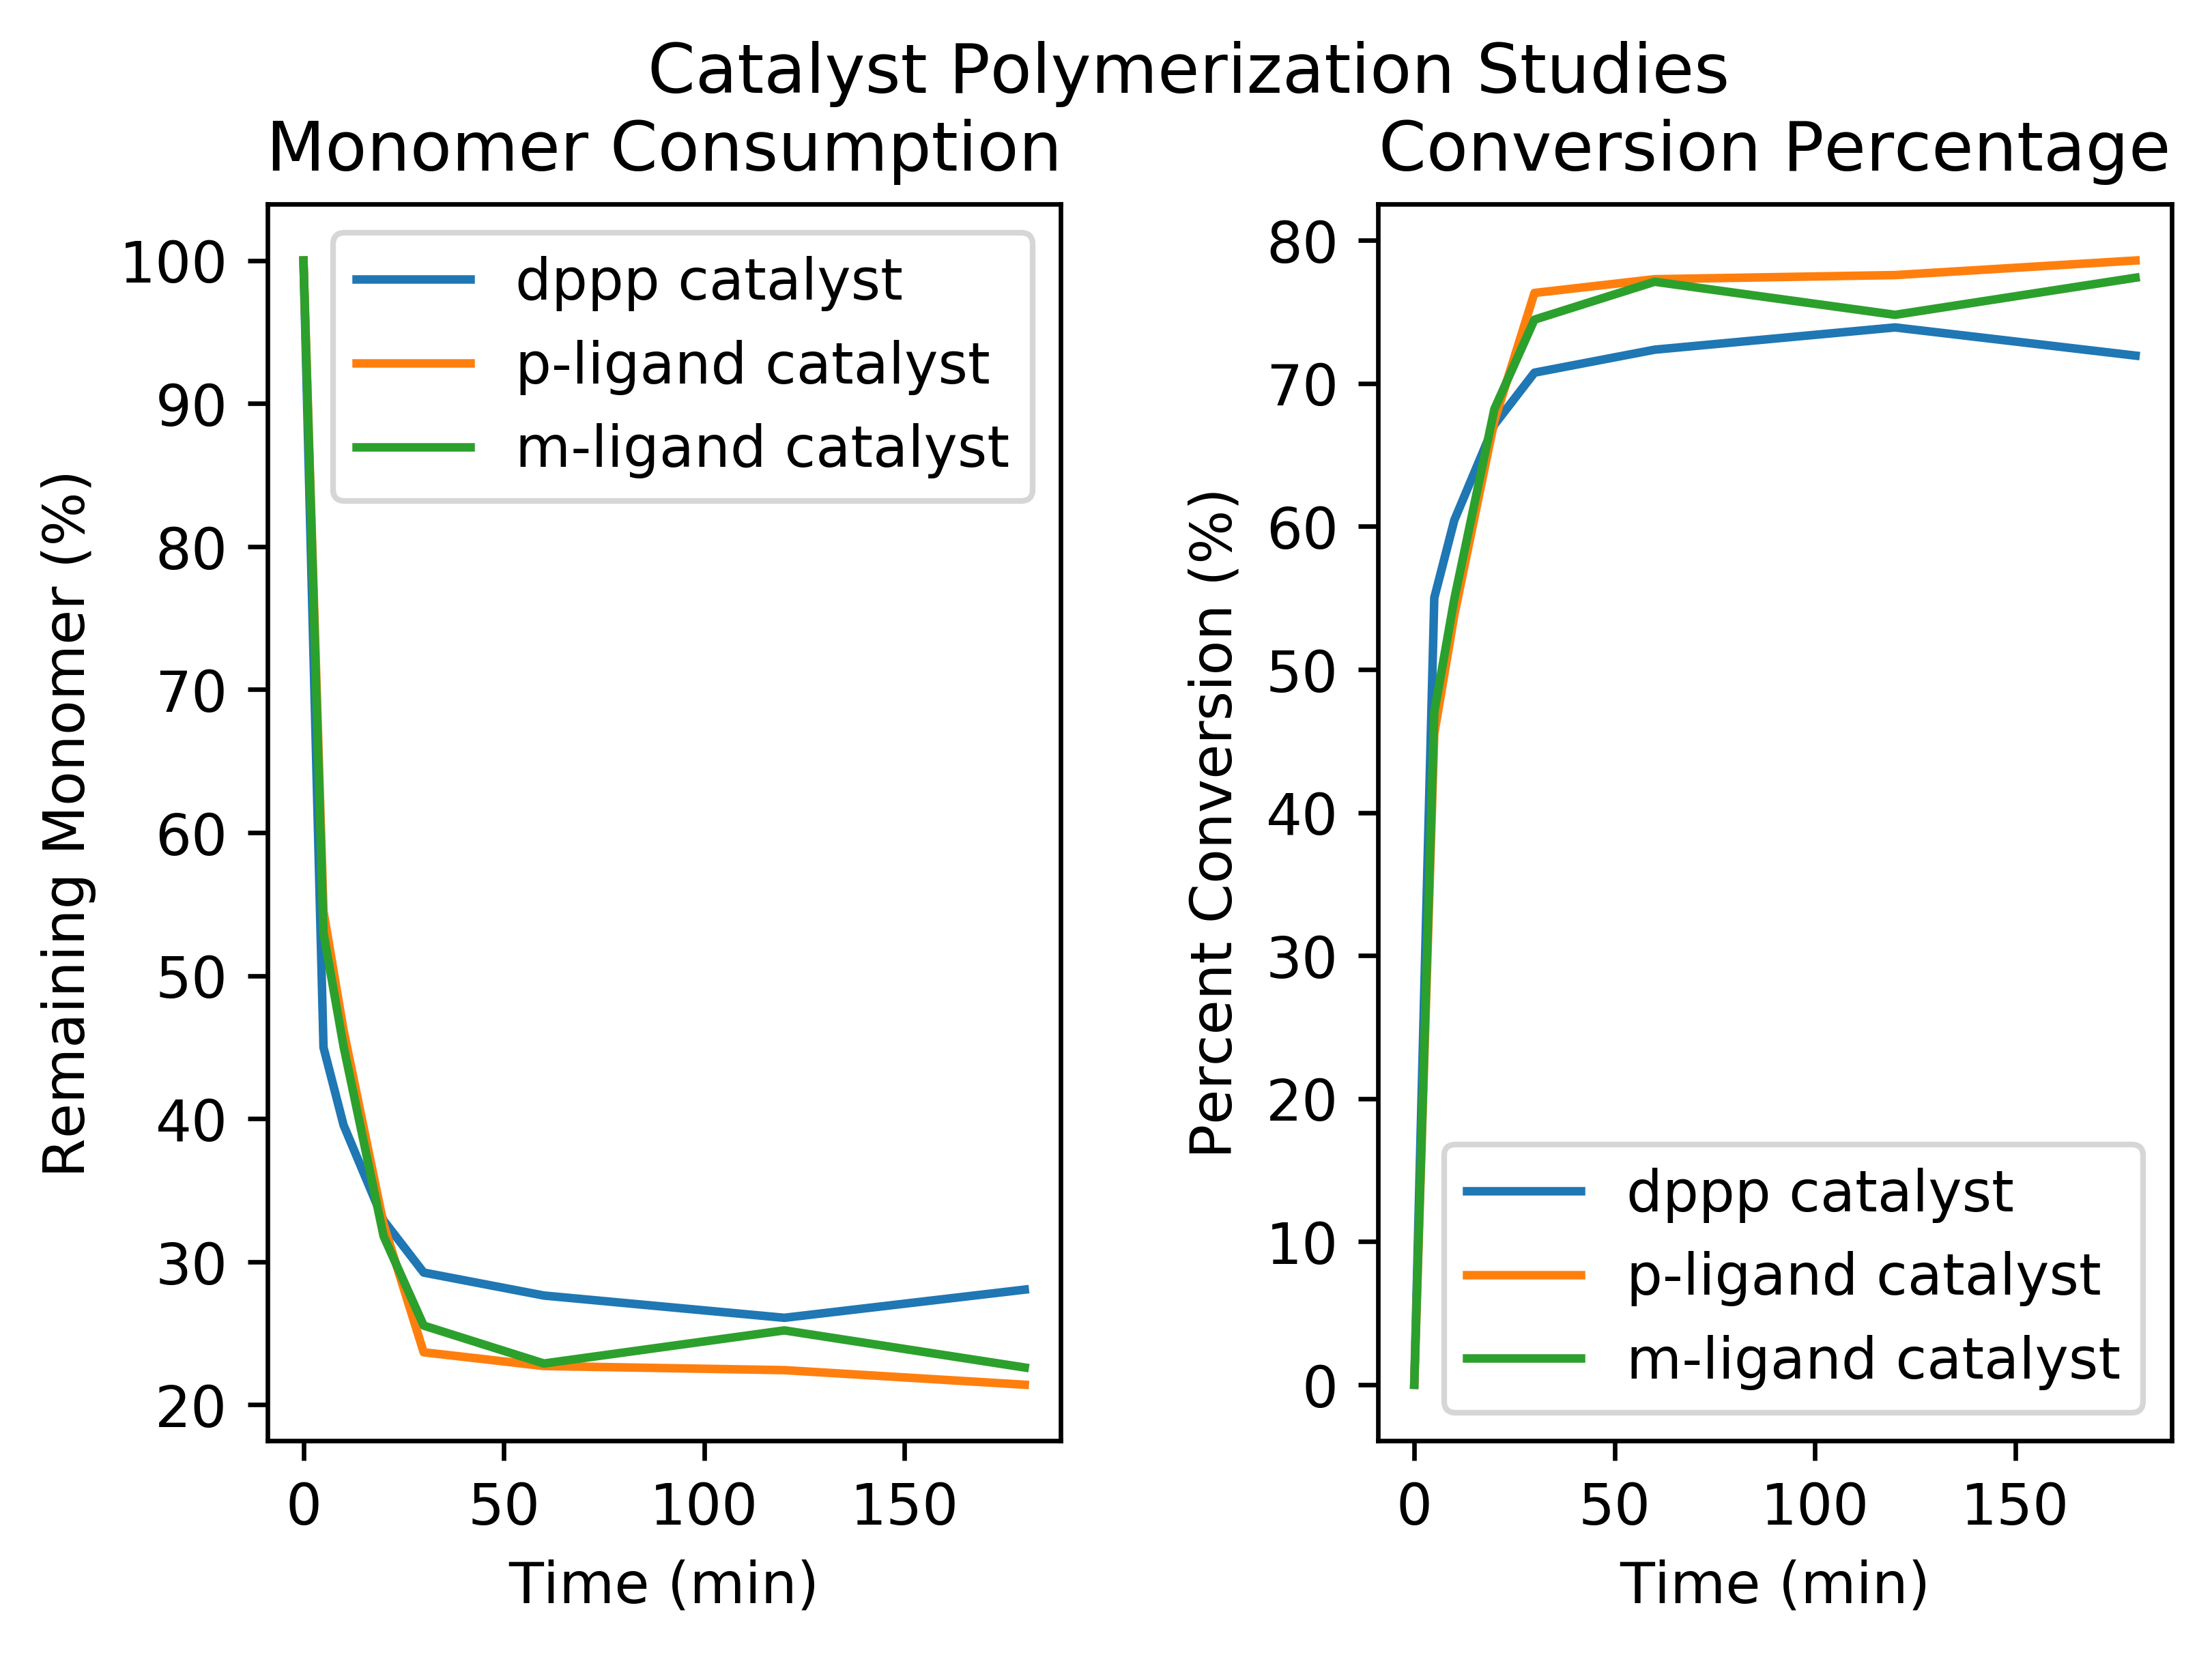

In [26]:
#First, for coding best practices, put the dataframes into a single dictionary. 
plot_dict = {'dppp catalyst': dppp, 'p-ligand catalyst': p_ligand, 'm-ligand catalyst': m_ligand}

#Next, let's generate our subplots. We add a 600 dpi here, because that's what's standard for most journals.
fig, ax = plt.subplots(1,2, dpi = 600)

#Then, loop through the dictionary to pull out the plotting information from each dataframe.
#You can see how quickly we can make several figures that are really similar, and of extremely high quality.
for i in plot_dict.keys():
    
    #By targeting which axis we want to plot on, we can quickly generate clean, separate graphics
    ax[0].plot(plot_dict[i]['Time'], plot_dict[i]['Average'], Label = str(i))
    
    #You can do math in a plotting statement if you want. 
    ax[1].plot(plot_dict[i]['Time'], 100-plot_dict[i]['Average'], Label = str(i))

ax[0].set(xlabel = "Time (min)", ylabel = "Remaining Monomer (%)")    
ax[1].set(xlabel = "Time (min)", ylabel = "Percent Conversion (%)")
ax[0].set_title("Monomer Consumption")
ax[1].set_title("Conversion Percentage")

#You can also set an overarching figure title:
fig.suptitle("Catalyst Polymerization Studies")

#Change spacing, so figures aren't overlapping
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

#Note that legend automatically picks the 'best' spot, but you can also tell it where to print the legend. 
ax[0].legend()
ax[1].legend()

#We can also save our figure by:
#fig.savefig("Filename you want it saved as .filetype extension")
plt.show()

Ok, there you have it! A full demo of matplotlib's plotting, using real data. 